# UFCFVQ-15-M Programming for Data Science (Autumn 2021)
# Resit Programming Task 2

## Student Id: 

### Requirement FR9 - Read CSV data from two files and merge it into a single Data Frame 

In [40]:
import os
import pandas as pd
from functools import reduce
from pprint import pprint
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import datetime

In [41]:
'''Reading the csv files'''


# Reading the csv files:resit_task2a.csv and resit_task2b.csv
df1 = pd.read_csv('resit_task2a.csv')
df2 = pd.read_csv('resit_task2b.csv')





In [42]:
'''viweing the first 5 rows'''
df1.head(5)

,timestamp,new_bike_shares
0,04/01/2015 00:00,182
1,04/01/2015 01:00,138
2,04/01/2015 02:00,134
3,04/01/2015 03:00,72
4,04/01/2015 04:00,47


In [43]:
#df1.head(5) 
df2.head(5)

,timestamp,temperature,feels_like_temp,humidity,wind_speed,is_weekend,season_code
0,04/01/2015 00:00,3.0,2.0,93.0,6.0,1,3
1,04/01/2015 01:00,3.0,2.5,93.0,5.0,1,3
2,04/01/2015 02:00,2.5,2.5,96.5,0.0,1,3
3,04/01/2015 03:00,2.0,2.0,100.0,0.0,1,3
4,04/01/2015 04:00,2.0,0.0,93.0,6.5,1,3


In [44]:
'''
The column "timestamp"  is common in both csv files from our observation above. 
I'm considering using merging the CSV file with inner join using the merge function in pandas
'''

# Merging the two csv files on the timestamp into one csv file called new_df. 
merged_df = pd.merge(df1, df2, on="timestamp")
merged_df.head(5)

,timestamp,new_bike_shares,temperature,feels_like_temp,humidity,wind_speed,is_weekend,season_code
0,04/01/2015 00:00,182,3.0,2.0,93.0,6.0,1,3
1,04/01/2015 01:00,138,3.0,2.5,93.0,5.0,1,3
2,04/01/2015 02:00,134,2.5,2.5,96.5,0.0,1,3
3,04/01/2015 03:00,72,2.0,2.0,100.0,0.0,1,3
4,04/01/2015 04:00,47,2.0,0.0,93.0,6.5,1,3


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR10 - Clean the merged data

In [45]:
#bike_clean = merged_df[merged_df.new_bike_shares>=20]
#bike_clean = bike_clean.drop('season_code', axis = 1)
#bike_clean.head(5)

In [46]:
'''Removing Remove all rows from the merged data whose bikes 
shares value is less than 20. Remove the unnecessary column  '''
#removing rows with below 20 in new bike shares
df3 = merged_df['new_bike_shares'] >= 20
df4 = merged_df.loc[df3]
#dropping season_code column
df5 = df4.drop('season_code', axis = 1)
df5.head(7)





,timestamp,new_bike_shares,temperature,feels_like_temp,humidity,wind_speed,is_weekend
0,04/01/2015 00:00,182,3.0,2.0,93.0,6.0,1
1,04/01/2015 01:00,138,3.0,2.5,93.0,5.0,1
2,04/01/2015 02:00,134,2.5,2.5,96.5,0.0,1
3,04/01/2015 03:00,72,2.0,2.0,100.0,0.0,1
4,04/01/2015 04:00,47,2.0,0.0,93.0,6.5,1
5,04/01/2015 05:00,46,2.0,2.0,93.0,4.0,1
6,04/01/2015 06:00,51,1.0,-1.0,100.0,7.0,1


In [47]:
#checked for missing values
df5.isna().sum()

timestamp          0
new_bike_shares    0
temperature        0
feels_like_temp    0
humidity           0
wind_speed         0
is_weekend         0
dtype: int64

In [48]:
#checking for duplicate values
df5.duplicated().sum()

0

In [49]:
df5.describe()

,new_bike_shares,temperature,feels_like_temp,humidity,wind_speed,is_weekend
count,17373.000000,17373.000000,17373.000000,17373.000000,17373.000000,17373.000000
mean,1145.763599,12.480391,11.536541,72.294840,15.912340,0.285961
std,1085.001662,5.568546,6.610268,14.312539,7.893567,0.451884
min,20.000000,-1.500000,-6.000000,20.500000,0.000000,0.000000
25%,260.000000,8.000000,6.000000,63.000000,10.000000,0.000000
50%,846.000000,12.500000,12.500000,74.500000,15.000000,0.000000
75%,1675.000000,16.000000,16.000000,83.000000,20.500000,1.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,1.000000


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR11 - Investigate the distribution of bike shares by time of the day

In [50]:
'''create a new column and assign formated timestamp to dt hour to it
Group with thr average of new bike shares and name column bike shares '''
from datetime import datetime
#format timestamp column to datetype format
#creating a new column date_hour to extract the hours in timestamp
df5['date_hour'] = pd.to_datetime(df5['timestamp']).dt.hour
#grouping created column date_hour and renaming the mean of new_bike_shares to bike_shares
df6=df5.groupby(["date_hour"], sort= True)["new_bike_shares"].mean().reset_index(name = 'bike_shares')
df6.head()


  




,date_hour,bike_shares
0,0,290.609116
1,1,201.167590
2,2,137.652174
3,3,96.862464
4,4,73.859944


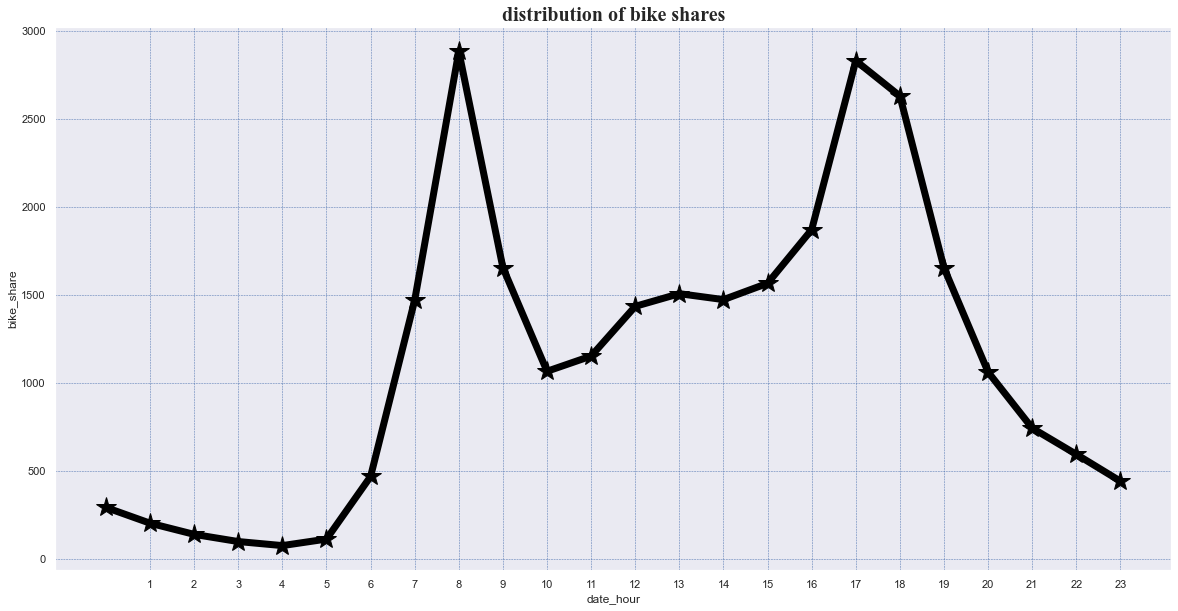

In [51]:
'''plotting a line graph of date_hour by bike_shares'''
#implementing the code for size of the graph being plotted
plt.figure(figsize=(20,10))

date_hr = df6["date_hour"]
bike_share = df6["bike_shares"]
plt.plot(date_hr, bike_share, lw=7, color='black',marker = '*', ms = 20)
plt.title('distribution of bike shares',loc = 'center', 
fontname="Times New Roman", size=20,fontweight="bold")

plt.xlabel('date_hour')
plt.ylabel('bike_share')
#plt.axes(facecolor='#E6E6E6')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.grid(color='b', linestyle = '--', linewidth = 0.5)

plt.show()
  

'''The Line graph is a representation of the distribution of bike shares by the time of the day.
The x axis reresents the average of new bike shares and the y axis illustrates 24 hours of the day
The highest point is by 8 a.m in the morning having abode 2750 bike shares followed by 17.00(5p.m) in the evening>
The lowest point ranges from 1am to 5am in the early houurs of the day and 5am has the lowest demand.
The distribution entails that there is high demand by 8am and 17.00.
This can be attributted to various factors such as high movement of individuals ranging from working class citizens to business owners and students.
There is a reduction between 8 to 10 a.m shoeing reduced demand for bike shares.
The demand increases gradually until 5.00p.m when there is high movement of individuals returning from their various destination.'''

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR12 - Compare the distribution of bike shares by time of the week

In [52]:


'''Create a new column and assign formated timestamp to day name to it
Group with thr average of new bike shares and name column bike shares'''
df5['days_week'] = pd.to_datetime(df5['timestamp']).dt.day_name()
df7=df5.groupby("days_week")["new_bike_shares"].mean().reset_index(name = 'bike_shares')
df7



,days_week,bike_shares
0,Friday,1167.616307
1,Monday,1162.997577
2,Saturday,1040.958833
3,Sunday,1011.806860
4,Thursday,1203.308835
5,Tuesday,1229.585176
6,Wednesday,1203.468551


In [53]:
'''Create a categorical variable and use it to sort and index day_week'''
#converted column variables to ordered categorical and sorted days of the week
cate = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#df7['days_week'] = pd.Categorical(df7['days_week'], categories=cate, ordered=True)
df7 = df7.sort_values('days_week')
#created index from days_week column using set.index,reindexed the columns and 
df7 = df7.set_index('days_week').reindex(cate).reset_index()
df7

,days_week,bike_shares
0,Monday,1162.997577
1,Tuesday,1229.585176
2,Wednesday,1203.468551
3,Thursday,1203.308835
4,Friday,1167.616307
5,Saturday,1040.958833
6,Sunday,1011.806860


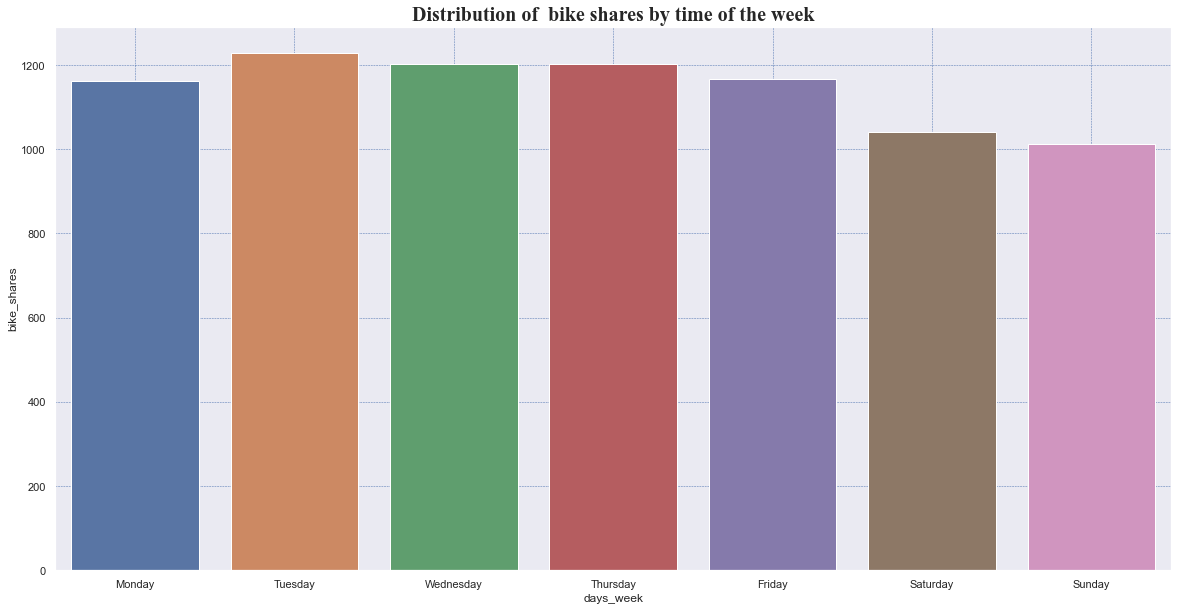

In [54]:
import seaborn as sns
import seaborn as sns; sns.set_theme(color_codes=True) 
plt.figure(figsize=(20,10))
ax = sns.barplot(x = df7['days_week'], y = df7['bike_shares'])

plt.title('Distribution of  bike shares by time of the week',loc = 'center', 
fontname="Times New Roman", size=20,fontweight="bold")




plt.grid(color='b', linestyle = '--', linewidth = 0.5)
plt.show()

The bar chart is an illustration of the distribution of bikes shared at various days of the week ranging from Monday to Sundays.The weekend days are Saturday and Sundays.
The highest bikeshares occured on tuesday and Wednesday 1223 and 1203 bike shares respectively.The lowest bike shares distribution occured on Sunday and Saturday with 1012 and 1041 bike shares respectively.
This further illustrated that demand is reduced for the bike distribution on the weekends probably due to the fact that offices are and schools are closed on the weekend and religious activities occur on sunday making the demand far reduced.
In conclusion,The weekdays have a higher distribution of bykes compared to the weekend.

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR13 - Investigate the effects of “feels like” temperature on the number of bike shares

In [55]:
'''effects of feels like temp on the number of bike distribution'''
#calculating the correlation coefficient
coef_temp = np.corrcoef(df5['feels_like_temp'],df5['new_bike_shares']) 
coef_temp
coef_temp[0,1]
coef_temp[1,0]

0.3677398669908882

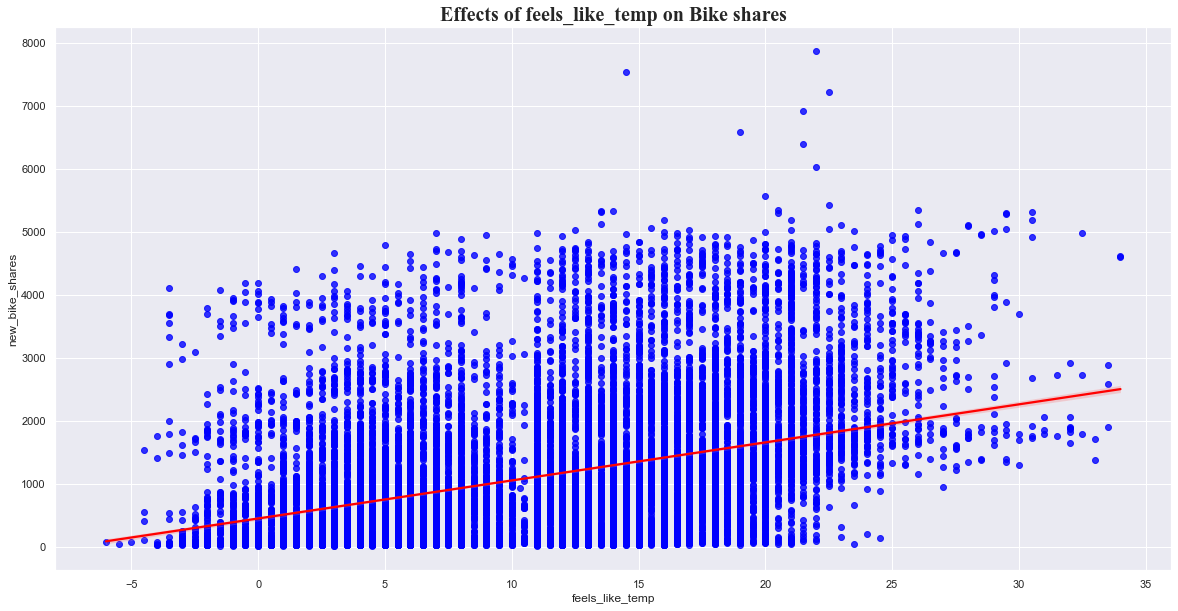

In [56]:
plt.figure(figsize=(20,10))
ax1 = sns.regplot(x="feels_like_temp", y="new_bike_shares", data=df5, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('Effects of feels_like_temp on Bike shares',loc = 'center', 
fontname="Times New Roman", size=20,fontweight="bold")
#ax1.legend(facecolor='white')
plt.show()

From the illustration above,Outliers exists in our data which can hamper accuracy of or analysis.
The correlation coefficient between feels like temp and new bike shares is 0.3677.
This represents a weak positive correlation between the variables as it is <0.41.
The regression line slope represents a weak positive relationship because higher feels_like_temp doesnt corresponds to higher new_bike_shares values.
The slope of the regressed line is low pointing to a weak relationship between the two variables.




<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR14 - Test the hypothesis that “feels like” temperature has an effect on the number of bike shares

In [57]:
'''Testing Hypothesis on the effect of feels like temperature to the number of share bike`'''
from scipy.stats import pearsonr
#implementing scipy to obtain the pearson's correlation coefficient
# The probability values are used to test the hypothesis using the t-test.
corr, p_value = pearsonr(df5['feels_like_temp'],df5['new_bike_shares'])
#print and round up to 2 decimal places
print(f'The correlation  is {corr:.2f} \nThe p value from the Hypothesis test is {p_value}')

The correlation  is 0.37 
The p value from the Hypothesis test is 0.0


In [59]:
'''Futher investigating using spearmanr coefficient'''
#rechecking the correlation coefficient implementing spearmanr
corr1=stats.spearmanr(df5['feels_like_temp'],df5['new_bike_shares'])
corr1

SpearmanrResult(correlation=0.3848990974360916, pvalue=0.0)

In [60]:
df5.corr()

,new_bike_shares,temperature,feels_like_temp,humidity,wind_speed,is_weekend,date_hour
new_bike_shares,1.000000,0.387682,0.367740,-0.461867,0.116693,-0.097966,0.322380
temperature,0.387682,1.000000,0.988354,-0.447289,0.145651,-0.006628,0.166575
feels_like_temp,0.367740,0.988354,1.000000,-0.402846,0.088818,-0.009871,0.151590
humidity,-0.461867,-0.447289,-0.402846,1.000000,-0.288153,0.029278,-0.293990
wind_speed,0.116693,0.145651,0.088818,-0.288153,1.000000,0.011153,0.142324
is_weekend,-0.097966,-0.006628,-0.009871,0.029278,0.011153,1.000000,0.000284
date_hour,0.322380,0.166575,0.151590,-0.293990,0.142324,0.000284,1.000000


The p_value is 0.0  and is <0.05. This is 0% probability.
feels like temp has no significant effect on new bike shares and there probably no relationship or no dependency existing between  the two variables.

Therefore the Null Hypothesis H_0-"“feels like” temperature has an effect on the number of bike shares" is Rejected.
In Alternate Hypothesis,There is no correlation between feels like temp and new bike shares an

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Coding Standards
<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Process Development Report for Resit Task 2


I started by importing libraries for this tasks which included pandas library for data manipulation,matplotlib and seaborn libraries for data visualization and scipy.stat for investigating probabilistic distributions and generate descriptive statistical values.

FR9 - I ensured the i copied the csv file to the same folder path as my pythin script to avoid errors and implemented read_csv to read resit_task2a and resit_task2b csv files to seperate dataframes.
I noticed the timestamp column was common in both dataframes when i viewed the individual dataframes.

FR10 - Merging the data frame was pretty easy using the merge function from pandas.I dropped the rows whose new_bike_share values was below and used the drop function to drop unwanted column season_code.I went on to check for missing values using .isna().sum() ans duplicate values with duplicated().sum() to ensure our investigations give accurate results.

FR11 - Created a new colum and extracting values gotten from by converting the timestamp column to  datetime format showing the different hours of the day.I renamed average of new_bike_shares column to bike_shares and grouped both created and renamed column together,reset the index.
Using matplotlib,I set the various plotting properties and and customized my visuals to conveyclear, accurate and meaningful insights.
The Line Graph illustration was appropriate to visualize that there was an early morning  and evening rush of new bike distribution by 8.00 a.m and 5.00p.m respectively due to high movement and activities in these time of the day.

FR12 - Grouped the newly created colum days_week which extracts converted timestamp column to day name values.It was sorted by creating an ordered categorical variable containing the days of the week and reset the index appropriately to ensure the start of the week is Monday.
Searborn library was imported and implemented to plot thr barplot with narious properties representing the distribution of bikes by the time of the week and the weekend consisting of Saturday and Sunday had a lower bike distribution compared to the weekdays.

FR13 - The Coefficient correlation of feels like temp and new bike distribution was calculated by np.corrcoef resulting to 0.3677 which is a weak positive correlation.
My further investigated of plotting a scatterplot and regplot entails that the slope is quite weak and higher feels_like_temp doesnt corresponds to higher new_bike_shares values.

FR14 - Using Scipy.stats to test the hypothesis that “feels like” temperature has an effect on the number of bike shares,I calculated the p_value using pearson's correlation coefficient and roundef it up to decimal places gave me a result of 0.37 and the p-value was 0.0.
Further investigation implementing spearmanr correlation resulted in a similar result of 0.384 ans p-value of 0.0. 
The Null hypothesis was rejected and the in the alternate hypothesis states that “feels like” temperature has an NO effect on the number of bike shares
Both investigations entails that both variables are independent with no or very small relationship.



Learning curves
I have learnt python naming convention pep8

Further knowledge in statistical inference,Machine learning and Tableau for data visualization has broadened my data wrangling and visualization techniques.
I have succesfully learnt how to clean and refactor data,use libraries effectively.
I have gained the understanding of using visualization to draw hidden insights for real life challenges.
I have also gained the understanding from this module how to interprete data sets and link them to real life scenerios.
I have also clearly understood hypothesis testing and usefulness


References

1.Learning Materials(Programming for Data Science with Python, University of West of England) By David Wyatt

2.Version Control - https://fetstudy.uwe.ac.uk/~di2-wyatt/FVQ/git_tutorial/#intro By David Wyatt

3.Lee, A. (2019). P-values Explained By Data Scientist. [online] Medium. Available at: https://towardsdatascience.com/p-values-explained-by-data-scientist-f40a746cfc8.(Accessed 22 Jun. 2022)

4.Stack Overflow. (n.d.). python - Sorting pandas dataframe by weekdays. [online] Available at: https://stackoverflow.com/questions/53189216/sorting-pandas-dataframe-by-weekdays [Accessed 22 Jun. 2022].

‌5.EliteDataScience. (2017). The Ultimate Python Seaborn Tutorial: Gotta Catch 'Em All. [online] Available at: https://elitedatascience.com/python-seaborn-tutorial.
‌
‌

add text here

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>